In [43]:
import pandas as pd
path_data = '../../../assets/data/'
import numpy as np

import matplotlib
matplotlib.use('Agg')
%matplotlib inline
# import matplotlib.pyplot as plots
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

nhl = pd.read_csv(path_data + 'nhl_salaries.csv')
nhl = nhl.drop(['Rank'], axis=1)

<span style="color:green">Not a big deal, but I've always seen matplotlib.pyplot imported as plt. Could be good to use this so stackoverflow examples are more intuitive for the students. I added this above.</span> 

# Cross-Classifying by More than One Variable

When individuals have multiple features, there are many different ways to classify them. For example, if we have a population of college students for each of whom we have recorded a major and the number of years in college, then the students could be classified by major, or by year, or by a combination of major and year.

The `groupby` method also allows us to classify individuals according to multiple variables. This is called *cross-classifying*.

## Two Variables: Counting the Number in Each Paired Category
The dataframe `more_cones` records the flavor, color, and price of six ice cream cones.

In [44]:
more_cones = pd.DataFrame(
    {'Flavor': ['strawberry', 'chocolate', 'chocolate', 'strawberry', 'chocolate', 'bubblegum'],
    'Color': ['pink', 'light brown', 'dark brown', 'pink', 'dark brown', 'pink'],
    'Price': [3.55, 4.75, 5.00, 5.25, 5.25, 4.75]
    }
)

more_cones

,Flavor,Color,Price
0,strawberry,pink,3.55
1,chocolate,light brown,4.75
2,chocolate,dark brown,5.00
3,strawberry,pink,5.25
4,chocolate,dark brown,5.25
5,bubblegum,pink,4.75


We know how to use `groupby` and count the number of cones of each flavor:

In [45]:
more_cones.groupby('Flavor').count()

,Color,Price
Flavor,,
bubblegum,1,1
chocolate,3,3
strawberry,2,2


But now each cone has a color as well. To classify the cones by both flavor and color, we will pass a list of columns as an argument to `groupby`. The resulting dataframe has one row for every *unique combination* of values that appear together in the grouped columns. As before, a single argument (a list, in this case, but an array would work too) needs to be passed.

Although there are six cones, there are only four unique combinations of flavor and color. Two of the cones were dark brown chocolate, and two pink strawberry.

In [46]:
more_cones.groupby(['Flavor', 'Color']).count()

Price
Flavor     Color             
bubblegum  pink             1
chocolate  dark brown       2
           light brown      1
strawberry pink             2

## Two Variables: Finding a Characteristic of Each Paired Category
The aggregation function aggregates all other columns that are not in the list of grouped columns.

In [47]:
more_cones.groupby(['Flavor', 'Color']).sum()

Price
Flavor     Color             
bubblegum  pink          4.75
chocolate  dark brown   10.25
           light brown   4.75
strawberry pink          8.80

**Three or More Variables.** You can use `groupby` to classify rows by three or more categorical variables. Just include them all in the list that is the first argument. But cross-classifying by multiple variables can become complex, as the number of distinct combinations of categories can be quite large. 

## Pivot Tables: Rearranging the Output of `group`
Many uses of cross-classification involve just two categorical variables, like `Flavor` and `Color` in the example above. In these cases it is possible to display the results of the classification in a different kind of table, called a *pivot table*. Pivot tables, also known as *contingency tables*, make it easier to work with data that have been classified according to two variables.

Recall the use of `groupby` with aggregate function mean to calculate the average price of cones in each paired category of flavor and color:

In [48]:
more_cones.groupby(['Flavor', 'Color']).mean()

Price
Flavor     Color             
bubblegum  pink         4.750
chocolate  dark brown   5.125
           light brown  4.750
strawberry pink         4.400

The same data can be displayed differently using the method `pivot_table`. Ignore the code for a moment, and just examine the table of outcomes.

In [49]:
more_cones.pivot_table(index ='Flavor', columns = 'Color')

Price                  
Color      dark brown light brown  pink
Flavor                                 
bubblegum         NaN         NaN  4.75
chocolate       5.125        4.75   NaN
strawberry        NaN         NaN  4.40

Notice how this table displays all nine possible pairs of flavor and color, including pairs like "dark brown bubblegum" that don't exist in our data. By default a NaN is placed by pandas to represent Null. Notice also that the mean in each pair appears in the body of the table: to find the number of light brown chocolate cones, run your eye along the row `light brown` until it meets the column `chocolate`.

**`pivot_table`** 

The `pivot_table` method is closely related to the `groupby` method: it groups together rows that share a combination of values. It differs from `groupby` because it organizes the resulting values in a grid. The first argument to `pivot` is the label of a column that contains the values that will be used to form new columns in the result. The second argument is the label of a column used for the rows. The result gives the count of all rows of the original table that share the combination of column and row values.

Like `groupby`, `pivot_table` can be used with additional arguments to find characteristics of each paired category. An optional third argument called `values` indicates a column of values that will replace the counts in each cell of the grid.  The fourth argument `aggfunc` indicates how to aggregate them all into one aggregated value to be displayed in the cell. If not provided pandas apply mean by default. The `fill_value` is an optional argument which replace NaN with a certain value.

An example will help clarify this. Here is `pivot_table` being used to find the total price of the cones in each cell.  

In [50]:
# Leo: I re-formatted this so it doesn't get cut off in the browser format.
more_cones.pivot_table(
    index ='Flavor', 
    columns = 'Color', 
    values = 'Price', 
    aggfunc = 'sum', 
    fill_value=0
)

Color,dark brown,light brown,pink
Flavor,,,
bubblegum,0.00,0.00,4.75
chocolate,10.25,4.75,0.00
strawberry,0.00,0.00,8.80


And here is <s>`group`</s> <span style="color:green">groupby</span> doing the same thing.

In [51]:
more_cones.groupby(['Flavor', 'Color']). sum()

Price
Flavor     Color             
bubblegum  pink          4.75
chocolate  dark brown   10.25
           light brown   4.75
strawberry pink          8.80

Though the numbers in both tables are the same, table produced by `pivot_table` is easier to read and lends itself more easily to analysis. The advantage of `pivot_table` is that it places grouped values into adjacent columns, so that they can be combined and compared.

## Example: NHL Salaries
Let's recall our NHL dataset one more time. Each player's `Name`, `Team`, `Position` and `Salary` are recorded. 


In [52]:
nhl

,Name,Team,Position,Salary
0,Nathan MacKinnon,COL,C,12600000
1,Connor McDavid,EDM,C,12500000
2,Artemi Panarin,NYR,LW,11642857
3,Auston Matthews,TOR,C,11640250
4,Erik Karlsson,PIT,D,11500000
...,...,...,...,...
796,Stefan Noesen,CAR,RW,762500
797,Vincent Desharnais,EDM,D,762500
798,Boris Katchouk,OTT,LW,758333
799,Taylor Raddysh,CHI,RW,758333


Each row of the dataframe corresponds to a combination of Name, Team, Position and Salary. There are 801 such combinations in all! 

As a first step, it is a good idea to start with just one or two variables. We will focus on just one pair: Team and Position. 

For example, we may ask:

**How much each Team spent for each Position?**

To answer this question, we must classify by the `Team` and `Position` columns. Let's start by looking at the `Position` column.

In [53]:
Pos_totals = nhl[['Position','Salary']].groupby('Position').sum()
Pos_totals

,Salary
Position,
C,820674657
D,831857180
G,220328332
LW,428852507
RW,296673023


There are only five categories of Position. The values are so large that it is more helpful to look at percents. For this, we will use the function `percents`. It converts an array of numbers to an array of percents out of the total in the input array.

In [54]:
def percents(array_x):
    return np.round( (array_x/sum(array_x))*100, 2)

In [55]:
Pos_totals['Salary Percent'] = percents (Pos_totals['Salary'])
Pos_totals

,Salary,Salary Percent
Position,,
C,820674657,31.58
D,831857180,32.01
G,220328332,8.48
LW,428852507,16.50
RW,296673023,11.42


We now have the distribution of Salaries among different positions in NHL. More than 33% of the total budget is spent on the Center position, while almost 8.5% is spent on the goalie.

By using `pivot_table`, we can get a contingency dataframe (a dataframe of sum) of NHL players cross-classified by `Position` and `Team`.

In [56]:
totals = nhl.pivot_table(index = 'Position',columns = 'Team', values='Salary', aggfunc = 'sum', fill_value=0)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # displays the entire dataframe
    display(totals)

Team,ANA,ARI,BOS,BUF,CAR,CBJ,CGY,CHI,COL,DAL,DET,EDM,FLA,LAK,MIN,MTL,NJD,NSH,NYI,NYR,OTT,PHI,PIT,SEA,SJS,STL,TBL,TOR,VAN,VGK,WAS,WPG
Position,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
C,22369167,28990999,19207500,20462023,30845000,12287500,23288333,18300000,21850000,24058334,26835000,44000000,30666667,27344167,13463333,21875000,20175000,20707412,39005000,24207500,30922500,28613333,29125000,11064166,20204167,31484524,30575000,36440116,26558750,43225000,18790833,23733333
D,15762500,13518810,32287500,23510714,33679167,31516666,17176667,22247500,26800000,25688333,25788333,27262500,21986667,26732500,22550000,13945832,23343333,30984000,25475000,27734500,22030000,27400000,27725175,26497500,18625000,28350000,36645000,37475000,32300000,32944150,24425833,29449000
G,7212500,4675000,8475000,2637500,6162500,6450000,8200000,4762500,6175000,5000000,7150000,3362500,11100000,3375000,7250000,12390000,6600000,7000000,6750000,6491667,6750000,859167,6875000,7100000,6525000,6775000,11050000,11441666,6800000,10666666,6350000,7916666
LW,9570000,9475000,13925000,14550000,12010250,11600000,23337500,10000000,17250000,32450000,4750000,7875000,14110000,21825000,20018333,5300000,24538333,11000000,5300000,30175356,13940713,9375000,7100000,19134167,6813333,12910833,9941665,10221667,6625000,2225000,15112500,16392857
RW,13950000,9025063,12025000,10363333,12712500,13900000,825000,3158333,16475000,0,13550000,1550000,7500000,3069167,7700000,24025000,3138334,4757500,9262458,2900000,2950000,10600000,10925000,12350000,11900000,4450000,10275000,13053000,12525000,17366667,12141668,8250000


Here you see the power of `pivot_table` over other cross-classification methods. Each column of sum is a distribution of the amount spent at a specific position. Converting the counts to percentages allows us to compare the 5 distributions.

In [57]:
distributions = totals.apply(percents, axis=0)
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(distributions)

Team,ANA,ARI,BOS,BUF,CAR,CBJ,CGY,CHI,COL,DAL,DET,EDM,FLA,LAK,MIN,MTL,NJD,NSH,NYI,NYR,OTT,PHI,PIT,SEA,SJS,STL,TBL,TOR,VAN,VGK,WAS,WPG
Position,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
C,32.48,44.14,22.36,28.61,32.33,16.22,31.98,31.30,24.68,27.59,34.37,52.35,35.92,33.21,18.97,28.21,25.93,27.81,45.46,26.45,40.37,37.23,35.63,14.53,31.54,37.49,31.04,33.54,31.32,40.61,24.46,27.68
D,22.89,20.58,37.58,32.87,35.30,41.60,23.59,38.05,30.27,29.46,33.03,32.44,25.76,32.46,31.77,17.99,30.01,41.62,29.69,30.31,28.76,35.66,33.91,34.80,29.07,33.76,37.21,34.50,38.09,30.95,31.80,34.35
G,10.47,7.12,9.86,3.69,6.46,8.51,11.26,8.15,6.97,5.73,9.16,4.00,13.00,4.10,10.21,15.98,8.48,9.40,7.87,7.09,8.81,1.12,8.41,9.32,10.18,8.07,11.22,10.53,8.02,10.02,8.27,9.23
LW,13.90,14.42,16.21,20.34,12.59,15.31,32.04,17.10,19.48,37.21,6.08,9.37,16.53,26.50,28.20,6.84,31.54,14.78,6.18,32.98,18.20,12.20,8.68,25.13,10.63,15.38,10.09,9.41,7.81,2.09,19.67,19.12
RW,20.26,13.74,14.00,14.49,13.32,18.35,1.13,5.40,18.61,0.00,17.36,1.84,8.79,3.73,10.85,30.99,4.03,6.39,10.80,3.17,3.85,13.79,13.36,16.22,18.57,5.30,10.43,12.02,14.77,16.32,15.81,9.62


Let's compare two finalists 'FLA' and 'EDM'. At a glance, you can see that the Edmonton Oilers spent over 52% of its total budget on the Central position while the Florida Panthers spent below 36% on the central position making the expenditure more balanced among the positions.

In [58]:
distributions.iloc[:, 11:13]

Team,EDM,FLA
Position,,
C,52.35,35.92
D,32.44,25.76
G,4.00,13.00
LW,9.37,16.53
RW,1.84,8.79


<Axes: ylabel='Position'>

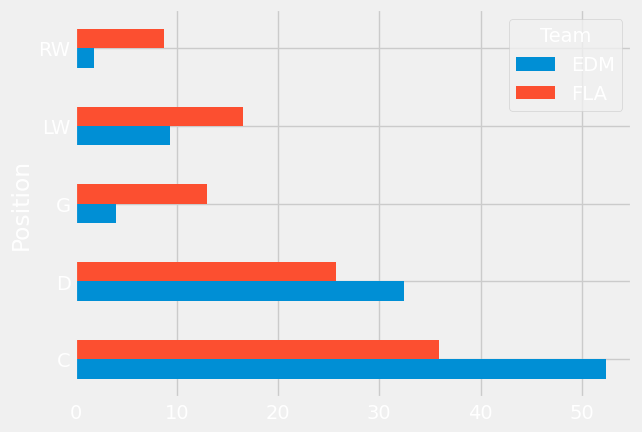

In [60]:
distributions.iloc[:, 11:13].plot.barh()